In [ ]:
BOLLYWOOD DATASET ANALYSIS

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\HP\Downloads\bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [ ]:
##QUESTION 1 -How many records are present in the dataset?

In [117]:
a=df.shape[0]
a

149

In [9]:
##QUESTION2 - How many movies were released in each Release Time?Sort number of releases in Release Time  in descending order. 


In [10]:
df.ReleaseTime.value_counts(sort=True, ascending=False)

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

In [11]:
##QUESTION3 - Which genre had highest number of releases during the Festive Season?

In [55]:
n=df[df['ReleaseTime']=='FS']
n['Genre'].value_counts()

 Drama      4
Thriller    4
Comedy      3
Action      3
Romance     3
Name: Genre, dtype: int64

In [26]:
##QUESTION4 - How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre andReleaseTime.)

In [65]:
pd.crosstab(df['ReleaseTime'], df['Genre'])

Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [44]:
##Question5 - In which yearwere maximum number movie released? (Note: Extract a new column called yearfromReleaseDatecolumn.)

In [20]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Year'] = df['Release Date'].apply(lambda s:s.year)
df['Release Month'] = df['Release Date'].apply(lambda s:s.month)
year_counts = df['Release Year'].value_counts()
year_counts.loc[year_counts == year_counts.max()]

2014    70
Name: Release Year, dtype: int64

In [67]:
##Question 6 - Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 30crore or more?

In [79]:
highest=df[df['Budget']>=30]
df['Month']= df['Release Date'].dt.month
a=highest['Month'].value_counts()
a

2     8
8     7
1     6
11    6
6     5
7     5
9     4
10    4
3     3
4     3
5     3
12    2
Name: Month, dtype: int64

In [80]:
##QUESTION 7 - Which are the top 10 flop movies with minimumreturn on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection–Budget) / Budget.

In [96]:
new_column=df['ROI']=df['BoxOfficeCollection'] - df['Budget'] / df['Budget']
n=df.sort_values('ROI' ,ascending=True)[0:10]
n[['MovieName' ,'ROI']]
n

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,month,Month,ROI
9,10,2013-01-11,Gangoobai,N,Drama,2,0.01,4354,1,1,2013,1,1,-0.99
15,16,2013-01-18,Bandook,N,Action,4,0.09,28391,8,14,2013,1,1,-0.91
53,54,2013-03-22,Sona Spa,N,Thriller,10,0.24,79430,61,112,2013,3,3,-0.76
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013,1,1,-0.65
49,50,2014-05-02,Kya Dilli Kya Lahore,HS,Drama,7,0.50,492344,2018,64,2014,5,5,-0.50
63,64,2014-01-17,Miss Lovely,N,Drama,5,0.70,808439,328,95,2014,1,1,-0.30
67,68,2014-05-02,Purani Jeans,HS,Romance,10,1.10,1537063,822,229,2014,5,5,0.10
121,122,2013-11-08,Satya 2,FS,Thriller,15,1.10,110315,89,26,2013,11,11,0.10
30,31,2014-02-07,Heartless,N,Thriller,12,1.50,4823892,5797,227,2014,2,2,0.50
126,127,2013-10-11,Baat Ban Gayi,FS,Comedy,4,1.50,23186,9,4,2013,10,10,0.50


In [97]:
##QUESTION8 - Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [7]:
new_column=df['ROI']=(df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
n=df.sort_values('ROI' ,ascending=False)[0:10]
n[['MovieName' ,'ROI']]
n

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6.240000
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,5.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,5.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,5.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,4.466667
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,4.266667


In [99]:
##QUESTION9 - Isthere a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [114]:
correlation=df.corr(method='pearson')
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

0.6825165877731297

In [101]:
##QUESTION 10 - Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.

[Text(0.5, 1.0, 'Boxplot for Each Genre of Movies based on Youtube Views')]

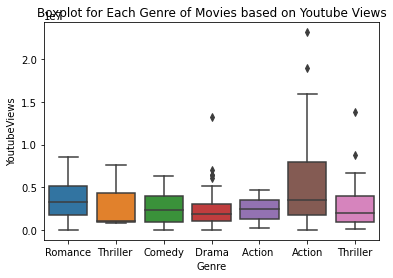

In [106]:
sns.boxplot(x = df["Genre"], y = df["YoutubeViews"]).set(title='Boxplot for Each Genre of Movies based on Youtube Views')

In [107]:
##QUESTION 11 - Which of the variables among Budget,BoxOfficeCollection,YoutubeView,YoutubeLikes,YoutubeDislikesare highly correlated? Note: Draw pair plot orheatmap.

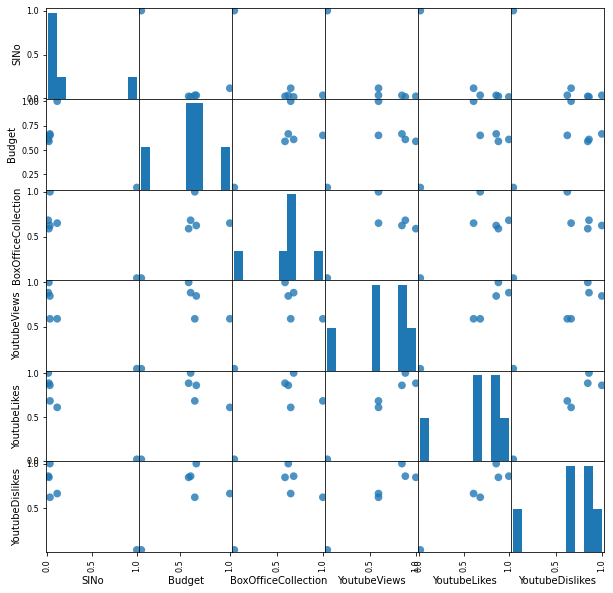

array([[<AxesSubplot:xlabel='SlNo', ylabel='SlNo'>,
        <AxesSubplot:xlabel='Budget', ylabel='SlNo'>,
        <AxesSubplot:xlabel='BoxOfficeCollection', ylabel='SlNo'>,
        <AxesSubplot:xlabel='YoutubeViews', ylabel='SlNo'>,
        <AxesSubplot:xlabel='YoutubeLikes', ylabel='SlNo'>,
        <AxesSubplot:xlabel='YoutubeDislikes', ylabel='SlNo'>],
       [<AxesSubplot:xlabel='SlNo', ylabel='Budget'>,
        <AxesSubplot:xlabel='Budget', ylabel='Budget'>,
        <AxesSubplot:xlabel='BoxOfficeCollection', ylabel='Budget'>,
        <AxesSubplot:xlabel='YoutubeViews', ylabel='Budget'>,
        <AxesSubplot:xlabel='YoutubeLikes', ylabel='Budget'>,
        <AxesSubplot:xlabel='YoutubeDislikes', ylabel='Budget'>],
       [<AxesSubplot:xlabel='SlNo', ylabel='BoxOfficeCollection'>,
        <AxesSubplot:xlabel='Budget', ylabel='BoxOfficeCollection'>,
        <AxesSubplot:xlabel='BoxOfficeCollection', ylabel='BoxOfficeCollection'>,
        <AxesSubplot:xlabel='YoutubeViews', ylabel='BoxO

In [115]:
g = pd.plotting.scatter_matrix(correlation, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()
g

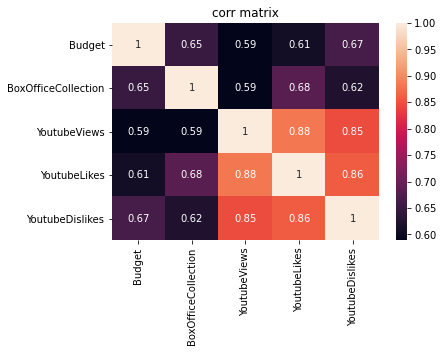

In [25]:
temp = df.loc[:, ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]
corrMatrix = temp.corr()
sns.heatmap(corrMatrix, annot = True)
plt.title('corr matrix')
plt.show()

In [120]:
##QUESTION 12-During 2013−2015 period,highlight the genre of movies and theirbox office collection? Visualize with best fit graph.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

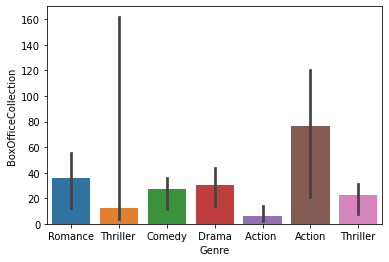

In [3]:
df = pd.DataFrame(df, columns = ['Genre','BoxOfficeCollection'])
from  numpy import median
sns.barplot(x="Genre",y="BoxOfficeCollection",data=df_12,estimator=median)

In [5]:
##QUESTION14-Find thedistribution of movie budgetforevery Genre.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

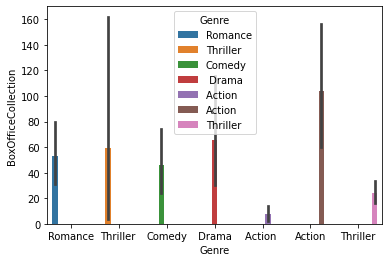

In [6]:
df_14 = pd.DataFrame(df, columns = ['Genre','BoxOfficeCollection'])
sns.barplot(x="Genre",y="BoxOfficeCollection",hue="Genre",data=df_14)

In [8]:
##QUESTION 15

Release Year
2013    324180
2014    710142
2015    139431
Name: YoutubeLikes, dtype: int64


<AxesSubplot:xlabel='Release Year'>

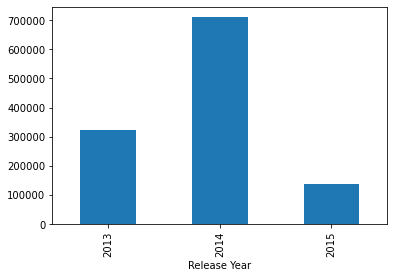

In [21]:
temp = df.groupby(['Release Year'])['YoutubeLikes'].agg('sum')
print(temp)
temp.plot(kind = 'bar')

In [22]:
#QUESTION13-During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

2014    70
2013    67
2015    12
Name: Release Year, dtype: int64


<AxesSubplot:>

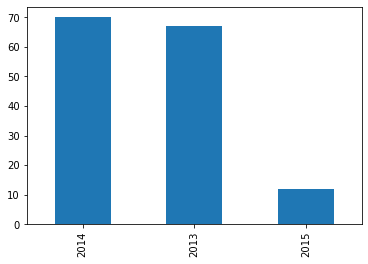

In [23]:
temp = df['Release Year'].value_counts()
print(temp)
temp.plot(kind = 'bar')